In [1]:
import pandas, glob, pickle, scipy, re, collections, importlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

rl = importlib.reload

import figureMaker
import utils
from peaksList import peaksList

import blocks
rl(blocks)
from blocks import blocki, blockii, blockiii

import countsColumnsNaming
import countsFileIO
import heatmap2

rl(figureMaker)
rl(countsFileIO)
rl(countsColumnsNaming)

rl(heatmap2)
prefix = '../v2/combined_filtered/'

fname_to_label = {
prefix + 'old_fbf2.txt': 'old_fbf2',
prefix + 'old_fbf1.txt': 'old_fbf1',
prefix + 'oo_both.txt': 'oo_both',
prefix + 'oo_fbf1.txt': 'oo_fbf1',
prefix + 'oo_fbf2.txt': 'oo_fbf2',
prefix + 'sp_both.txt': 'sp_both',
prefix + 'sp_fbf1.txt': 'sp_fbf1',
prefix + 'sp_fbf2.txt': 'sp_fbf2',
#prefix + 'old_fbf1_to_fbf2_n2.txt': 'old_fbf1_to_fbf2_n2',
}
label_to_fname = dict(zip(fname_to_label.values(), fname_to_label.keys()))



/Users/dfporter/pma/venv/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [18]:
exl = pandas.ExcelFile('../v2/tables/Table S1 Peaks.xls')

dfs = {}

print("Target numbers based on peaks:")

for sheet_name in exl.sheet_names:
    
    print(sheet_name)
    
    dfs[sheet_name] = pandas.read_excel(exl, sheet_name)
    
    print("# RNAs: {}".format(len(set(dfs[sheet_name]['Gene name']))))
    
    lincRNAs = [x for x in dfs[sheet_name]['Gene name'] if re.search('linc', x)]
    print("lincRNAs found: {}".format(lincRNAs))
    
exl = pandas.ExcelFile('../v2/tables/File S6 Blocks.xls')

pos_labels = set(
    ['gld-1','htp-1','htp-2','mpk-1','him-3','fbf-1','lip-1','syp-2',
     'fbf-2','fog-1','fem-3','syp-3','gld-3','fog-3','egl-4'])

found = set()

for sheet_name in exl.sheet_names:
    
    print(sheet_name)
    
    dfs[sheet_name] = pandas.read_excel(exl, sheet_name)
    
    print("# RNAs: {}".format(len(set(dfs[sheet_name]['Gene name']))))
    
    pos = set(dfs[sheet_name]['Gene name']) & pos_labels
    print("Positives ({} found): {}".format(len(pos), pos))
    found |= pos

    lincRNAs = [x for x in dfs[sheet_name]['Gene name'] if re.search('linc', x)]
    print("lincRNAs found: {}".format(lincRNAs))
    
print("Positives not found: {}".format(pos_labels - found))

Target numbers based on peaks:
SP FBF (25°C)
# RNAs: 1704
lincRNAs found: ['linc-7', 'linc-7', 'linc-4', 'linc-36', 'linc-71']
SP FBF-2 (25°C)
# RNAs: 1822
lincRNAs found: ['linc-7', 'linc-7', 'linc-4', 'linc-29']
SP FBF-1 (25°C)
# RNAs: 1804
lincRNAs found: ['linc-7', 'linc-7', 'linc-36', 'linc-29', 'linc-4']
OO FBF-2 (20°C)
# RNAs: 2028
lincRNAs found: ['linc-7', 'linc-7', 'linc-4']
OO FBF (25°C)
# RNAs: 1522
lincRNAs found: ['linc-7', 'linc-7', 'linc-4', 'linc-29']
OO FBF-1 (20°C)
# RNAs: 2456
lincRNAs found: ['linc-7', 'linc-7', 'linc-4', 'linc-29']
OO FBF-2 (25°C)
# RNAs: 464
lincRNAs found: []
OO FBF-1 (25°C)
# RNAs: 1064
lincRNAs found: ['linc-7', 'linc-7', 'linc-29']
Block I
# RNAs: 75
Positives (1 found): {'fog-3'}
lincRNAs found: ['linc-36']
Block II
# RNAs: 509
Positives (10 found): {'htp-2', 'lip-1', 'fbf-1', 'him-3', 'syp-2', 'mpk-1', 'fog-1', 'fem-3', 'gld-3', 'fbf-2'}
lincRNAs found: ['linc-7']
Block III
# RNAs: 21
Positives (2 found): {'htp-1', 'gld-1'}
lincRNAs found: 

In [10]:
df = pandas.read_excel('../v2/tables/File S5 Complex frequencies.xls')
print("Number of RNAs in heatmap: {}".format(len(df.index)))

Number of RNAs in heatmap: 2111


               exp_fbf1_sp_1  exp_fbf1_sp_2  exp_fbf1_sp_3  exp_fbf2_sp_1  \
exp_fbf1_sp_1       1.000000       0.975852       0.976935       0.788603   
exp_fbf1_sp_2       0.975852       1.000000       0.975738       0.782619   
exp_fbf1_sp_3       0.976935       0.975738       1.000000       0.794569   
exp_fbf2_sp_1       0.788603       0.782619       0.794569       1.000000   
exp_fbf2_sp_2       0.792314       0.783549       0.794597       0.978512   
exp_fbf2_sp_3       0.785555       0.777718       0.786101       0.978889   
exp_fbf1_oo_1       0.651501       0.657253       0.652231       0.620738   
exp_fbf1_oo_2       0.763720       0.764779       0.755437       0.695774   
exp_fbf1_oo_3       0.777308       0.777326       0.774695       0.711767   
exp_fbf2_oo_1       0.605364       0.603031       0.601473       0.759595   
exp_fbf2_oo_2       0.573271       0.571581       0.568805       0.725296   
exp_fbf2_oo_3       0.609191       0.605845       0.604116       0.757397   

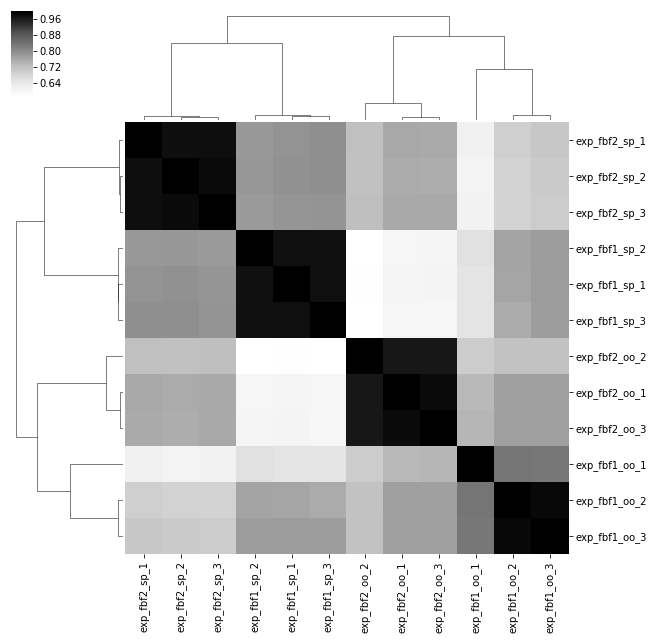

************************************************** 
20C
               exp_fbf1_CGGA  exp_fbf1_GGTT  exp_fbf1_TGGC  exp_fbf2_CGGA  \
exp_fbf1_CGGA       1.000000       0.973328       0.946266       0.839042   
exp_fbf1_GGTT       0.973328       1.000000       0.967369       0.876699   
exp_fbf1_TGGC       0.946266       0.967369       1.000000       0.869690   
exp_fbf2_CGGA       0.839042       0.876699       0.869690       1.000000   
exp_fbf2_GGTT       0.815911       0.863914       0.848883       0.976414   
exp_fbf2_TGGC       0.846013       0.882001       0.859318       0.983840   

               exp_fbf2_GGTT  exp_fbf2_TGGC  
exp_fbf1_CGGA       0.815911       0.846013  
exp_fbf1_GGTT       0.863914       0.882001  
exp_fbf1_TGGC       0.848883       0.859318  
exp_fbf2_CGGA       0.976414       0.983840  
exp_fbf2_GGTT       1.000000       0.970973  
exp_fbf2_TGGC       0.970973       1.000000  


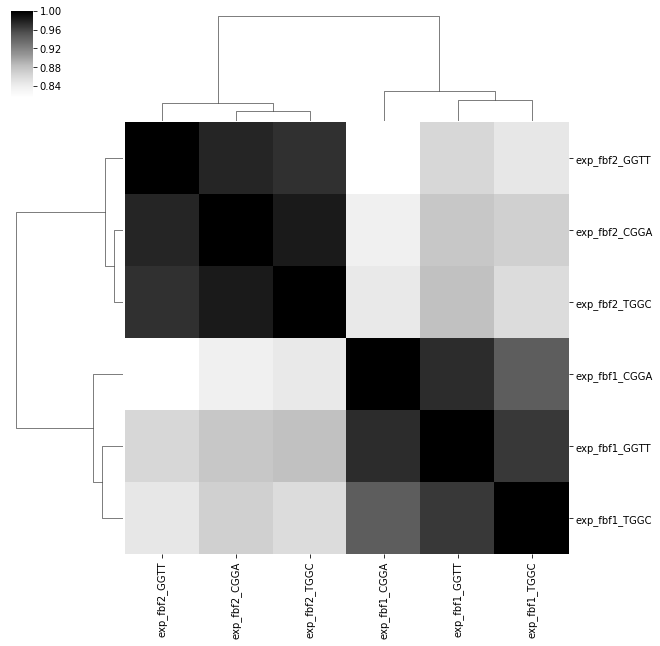

[0.839042357473062, 0.8159105871765711, 0.8460126833855395, 0.8766990995597324, 0.8639135925296849, 0.8820010555967349, 0.8696899352130228, 0.8488833701024433, 0.8593180904961629]
Average R: 0.8557189746147725


In [36]:
df = pandas.read_csv('../v2/tables/individual_replicate_binding_normalized_25C.txt', sep='\t')
print(df.corr('pearson'))
import seaborn as sns

sns.clustermap(df.corr('pearson'), cmap='Greys')
plt.show()
plt.clf()

print('*****' * 10, '\n20C')
df = pandas.read_csv('../v2/tables/individual_replicate_binding_normalized_20C.txt', sep='\t')
print(df.corr('pearson'))
import seaborn as sns

corr_df = df.corr('pearson')
sns.clustermap(corr_df, cmap='Greys')
plt.show()
plt.clf()

pairs = []
for fbf1 in [x for x in corr_df.columns if ('fbf1' in x)]:
    for fbf2 in [x for x in corr_df.columns if ('fbf2' in x)]:
        pairs.append(corr_df.loc[fbf1, fbf2])
print(pairs)
print("Average R: {}".format(np.mean(pairs)))

In [26]:
old = pandas.ExcelFile('../v2/tables/supp_055871.116_Supplemental_Table_S2.xls')

rna_paper_targets = {}
for sheetname in old.sheet_names:
    df = pandas.read_excel(old, sheetname)
    rna_paper_targets[sheetname] = set(df['Gene name'])


exl = pandas.ExcelFile('../v2/tables/Table S1 Peaks.xls')

dfs = {}

print("Target numbers based on peaks:")

for sheet_name in exl.sheet_names:
    
    print(sheet_name)
    
    dfs[sheet_name] = pandas.read_excel(exl, sheet_name)
    
    target_set = set(dfs[sheet_name]['Gene name'])
    print("# RNAs: {}".format(len(target_set)))
    
    for name, _targets in rna_paper_targets.items():
          fraction_of_rna_paper = len(target_set & _targets)/len(_targets)
          print("Fraction of {} in {}: {:.3}%".format(
              name, sheet_name, 100*fraction_of_rna_paper))
        
old_fbf1 = set(dfs['OO FBF-1 (20°C)']['Gene name'])
old_fbf2 = set(dfs['OO FBF-2 (20°C)']['Gene name'])
both = old_fbf1 & old_fbf2
print("In the new analysis, and at 20C, {}/{} FBF-1 targets overlap with FBF-2 ({:.3}%), \
and {}/{} FBF-2 targets overlap with FBF-1 ({:.3}%).".format(
    len(both), len(old_fbf1), 100*len(both)/len(old_fbf1),
    len(both), len(old_fbf2), 100*len(both)/len(old_fbf2)))

Target numbers based on peaks:
SP FBF (25°C)
# RNAs: 1704
Fraction of FBF-1 controlled to FBF-1 N2 in SP FBF (25°C): 55.0%
Fraction of FBF-1 controlled to FBF-2 N2 in SP FBF (25°C): 55.0%
Fraction of FBF-2 controlled to FBF-2 N2 in SP FBF (25°C): 72.3%
Fraction of FBF peaks with ncRNA in SP FBF (25°C): 67.1%
Fraction of FBF peaks without ncRNA in SP FBF (25°C): 67.6%
Fraction of FBF peaks & also RIP-chip in SP FBF (25°C): 79.5%
Fraction of FBF peaks & not RIP-chip in SP FBF (25°C): 58.9%
SP FBF-2 (25°C)
# RNAs: 1822
Fraction of FBF-1 controlled to FBF-1 N2 in SP FBF-2 (25°C): 60.1%
Fraction of FBF-1 controlled to FBF-2 N2 in SP FBF-2 (25°C): 60.1%
Fraction of FBF-2 controlled to FBF-2 N2 in SP FBF-2 (25°C): 83.9%
Fraction of FBF peaks with ncRNA in SP FBF-2 (25°C): 71.4%
Fraction of FBF peaks without ncRNA in SP FBF-2 (25°C): 72.1%
Fraction of FBF peaks & also RIP-chip in SP FBF-2 (25°C): 83.7%
Fraction of FBF peaks & not RIP-chip in SP FBF-2 (25°C): 63.3%
SP FBF-1 (25°C)
# RNAs: 1804
